# *Load Dataset (Iris Dataset Example)*

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Put in DataFrame to preview
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train 3 Different Models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
log_reg = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC()

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

# Evaluate Models

In [9]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "SVM": svm
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}: Accuracy = {acc:.3f}, F1-score = {f1:.3f}")

Logistic Regression: Accuracy = 1.000, F1-score = 1.000
Random Forest: Accuracy = 1.000, F1-score = 1.000
SVM: Accuracy = 1.000, F1-score = 1.000


# Save Models to /models/

In [11]:
import joblib

joblib.dump(log_reg, "../models/log_reg.pkl")
joblib.dump(rf, "../models/random_forest.pkl")
joblib.dump(svm, "../models/svm.pkl")

['../models/svm.pkl']

In [13]:
import mlflow
import mlflow.sklearn

# ✅ Fix: point MLflow to the running server
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("iris-model-comparison")

def train_and_log_model(model, model_name):
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Log hyperparameters
        mlflow.log_params(model.get_params())

        # Log metrics
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)

        # Confusion matrix plot
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{model_name} Confusion Matrix")

        plot_path = f"../results/{model_name}_cm.png"
        plt.savefig(plot_path)

        # Log artifact (confusion matrix image)
        mlflow.log_artifact(plot_path)

        # Log model itself
        mlflow.sklearn.log_model(model, model_name)

        print(f"{model_name}: Accuracy={acc:.3f}, F1={f1:.3f}")

2025/09/16 22:32:15 INFO mlflow.tracking.fluent: Experiment with name 'iris-model-comparison' does not exist. Creating a new experiment.


2025/09/16 22:32:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 22:32:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression: Accuracy=1.000, F1=1.000
🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/554107909743324967/runs/d88ffd0b16f4434a8107882a4a358126
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/554107909743324967


2025/09/16 22:32:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 22:33:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest: Accuracy=1.000, F1=1.000
🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/554107909743324967/runs/735ffd7f75a8443dbc7fd01cd76633ca
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/554107909743324967


2025/09/16 22:33:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 22:33:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM: Accuracy=1.000, F1=1.000
🏃 View run SVM at: http://127.0.0.1:5000/#/experiments/554107909743324967/runs/ca0c04fcb16c487daa43469284ea57eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/554107909743324967


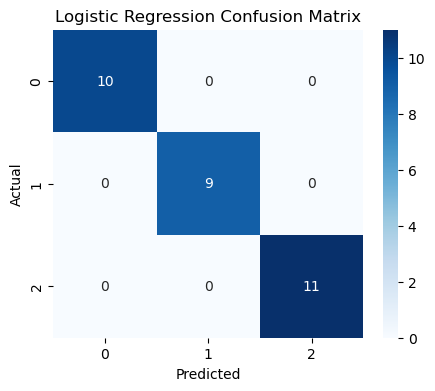

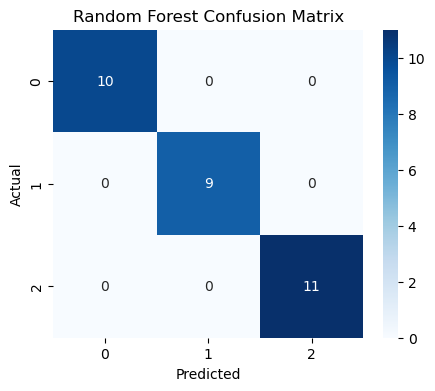

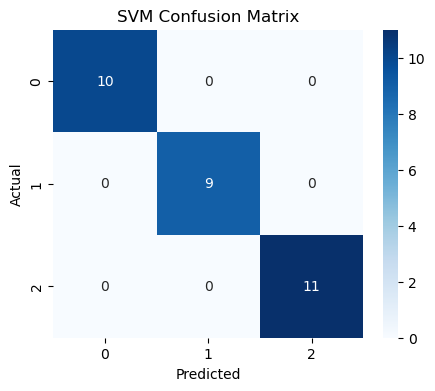

In [15]:
train_and_log_model(LogisticRegression(max_iter=200), "Logistic Regression")
train_and_log_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")
train_and_log_model(SVC(), "SVM")

In [17]:
import mlflow
from mlflow.tracking import MlflowClient

# Connect to MLflow tracking server
client = MlflowClient(tracking_uri="http://127.0.0.1:5000")

# Replace with the RUN_ID of your best model (copy it from MLflow UI)
best_run_id = "735ffd7f75a8443dbc7fd01cd76633ca"

# Register best model with name "iris-best-model"
model_name = "iris-best-model"
model_uri = f"runs:/{best_run_id}/Random Forest"   # 'Random Forest' is how we named it
client.create_registered_model(model_name)
client.create_model_version(name=model_name, source=model_uri, run_id=best_run_id)

2025/09/16 22:48:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: iris-best-model, version 1


<ModelVersion: aliases=[], creation_timestamp=1758044892287, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1758044892287, metrics=None, model_id=None, name='iris-best-model', params=None, run_id='735ffd7f75a8443dbc7fd01cd76633ca', run_link='', source='runs:/735ffd7f75a8443dbc7fd01cd76633ca/Random Forest', status='READY', status_message=None, tags={}, user_id='', version='1'>